<a href="https://colab.research.google.com/github/langmusi/Predictive-Modeling/blob/main/Baysian_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 
The following part is from: https://juanitorduz.github.io/intro_tfd/

In [ ]:
import numpy as np

# tensorflow.compat: allows to write code that works both in TensorFlow 1.x and 2.x
import tensorflow.compat.v2 as tf # It switches all global behaviors that are different between TensorFlow 1.x and 2.x to behave as intended for 2.x.
tf.enable_v2_behavior()

import tensorflow_probability as tfp
tfd = tfp.distributions

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(
    style = 'darkgrid',
    rc = {'axes.facecolor': '.9', 'grid.color': '0.8'}
)

sns.set_palette(palette = 'deep')
sns_c = sns.color_palette(palette = 'deep')

%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

In [ ]:
# get TensorFlow version -- not working
#print(f'TensoFlow version: {tf._version_}')
#print(f'TensorFlow Probability veriosn: {tfp._version_}')

## Distributions


In [ ]:
normal = tfd.Normal(loc = 0.0, scale = 1.0)
gamma = tfd.Gamma(concentration=5.0, rate=1.0)
poisson = tfd.Poisson(rate=2.0)
laplace = tfd.Laplace(loc=0.0, scale=1.0)

NameError: ignored

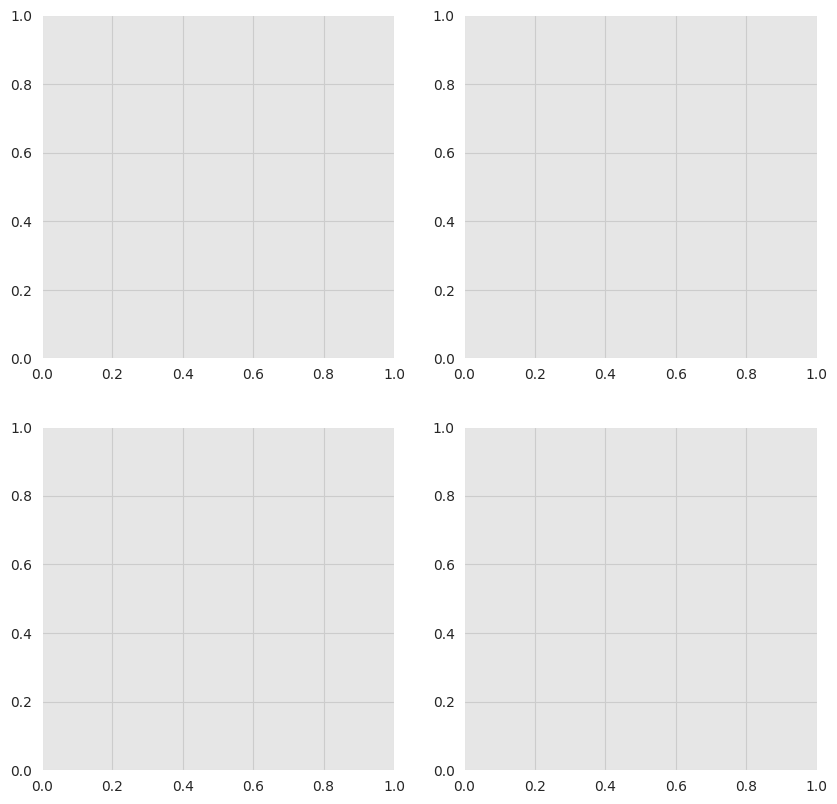

In [ ]:
n_samples = 800

fig, axes = plt.subplots(2, 2, figsize = (10, 10))
axes = axes.flatten()

sns.distplot(a=normal.sample(n_samples), color=sns_c[0], rug=True, ax=axes[0])
axes[0].set(title = f'Normal Distribution')

sns.distplot(a=gamma.sample(n_samples), color=sns_c[1], rug=True, ax=axes[1])
axes[1].set(title = f'Gamma Distribution')

sns.distplot(a=poisson.sample(n_samples), color=sns_c[2], rug=True, ax=axes[2])
axes[2].set(title = f'Poisson Distribution')

sns.distplot(a=laplace.sample(n_samples), color=sns_c[3], rug=True, ax=axes[3])
axes[3].set(title = f'Laplace Distribution')

plt.suptitle(f'Distribution Samples ({n_samples})', y = 0.95)


In [ ]:
for i in range(2):
  print(i)

0
1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

Text(0.5, 0.97, 'Distibution Samples (800)')

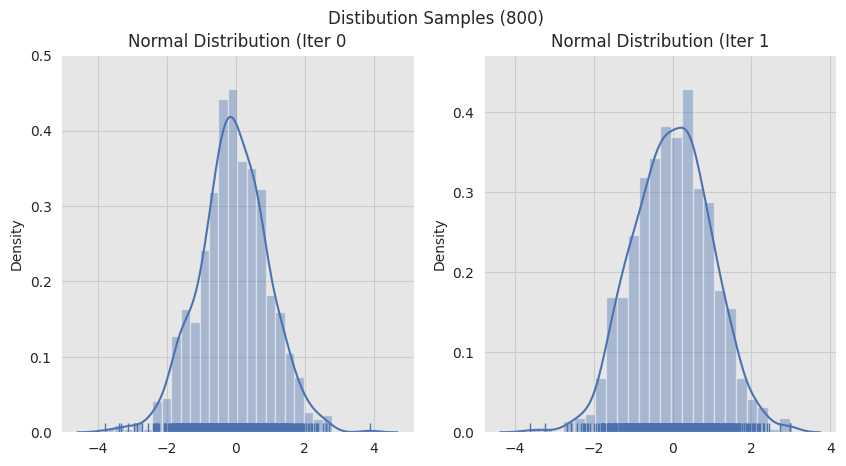

In [ ]:
# take samples based on a tensor of sizes
# batch shapes = left
# event shapes = right

normal_samples = normal.sample([n_samples, n_samples])

fig, axes = plt.subplots(1, 2, figsize = (10,5))
axes = axes.flatten()

for i in range(2):
  sns.distplot(a = normal_samples[i], color = sns_c[0], rug=True, ax= axes[i])
  axes[i].set(title=f'Normal Distribution (Iter {i}')

plt.suptitle(f'Distibution Samples ({n_samples})', y =0.97)  # y is the distance from the title to the figure

In [ ]:
normal_samples

<tf.Tensor: shape=(800, 800), dtype=float32, numpy=
array([[-0.1722759 , -0.66518664, -0.38037843, ...,  0.51198095,
         0.05888873,  1.8114638 ],
       [ 0.43047908,  1.4378904 , -0.13661157, ..., -0.10226804,
         0.35646996,  0.41183236],
       [-0.61706465,  1.3052045 , -0.4460605 , ...,  0.2128735 ,
         0.21061361, -1.0078821 ],
       ...,
       [-0.49736282, -1.5810392 ,  1.4164624 , ..., -0.8789132 ,
         0.5089161 ,  0.42735514],
       [-0.5182901 , -1.742172  , -0.2043381 , ..., -0.6425171 ,
         0.23738903, -0.8025284 ],
       [-0.7042973 , -1.4052265 , -0.2102569 , ...,  0.40908808,
         0.32716984, -0.985108  ]], dtype=float32)>

In [ ]:
# compute common statistics of the distribution samples

x = tf.linspace(start = -0.5, stop = 5.0, num = 100)
x

<tf.Tensor: shape=(100,), dtype=float32, numpy=
array([-0.5       , -0.44444445, -0.3888889 , -0.3333333 , -0.2777778 ,
       -0.22222221, -0.16666666, -0.1111111 , -0.05555555,  0.        ,
        0.05555558,  0.1111111 ,  0.16666669,  0.22222221,  0.2777778 ,
        0.3333333 ,  0.3888889 ,  0.44444448,  0.5       ,  0.5555556 ,
        0.61111116,  0.6666666 ,  0.7222222 ,  0.7777778 ,  0.8333334 ,
        0.88888896,  0.9444444 ,  1.        ,  1.0555556 ,  1.1111112 ,
        1.1666666 ,  1.2222222 ,  1.2777778 ,  1.3333334 ,  1.388889  ,
        1.4444444 ,  1.5       ,  1.5555556 ,  1.6111112 ,  1.6666667 ,
        1.7222223 ,  1.7777779 ,  1.8333333 ,  1.8888888 ,  1.9444444 ,
        2.        ,  2.0555556 ,  2.1111112 ,  2.1666667 ,  2.2222223 ,
        2.277778  ,  2.3333333 ,  2.3888888 ,  2.4444444 ,  2.5       ,
        2.5555556 ,  2.6111112 ,  2.6666667 ,  2.7222223 ,  2.777778  ,
        2.8333333 ,  2.8888888 ,  2.9444444 ,  3.        ,  3.0555556 ,
        3.111111

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Normal Distribution')]

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


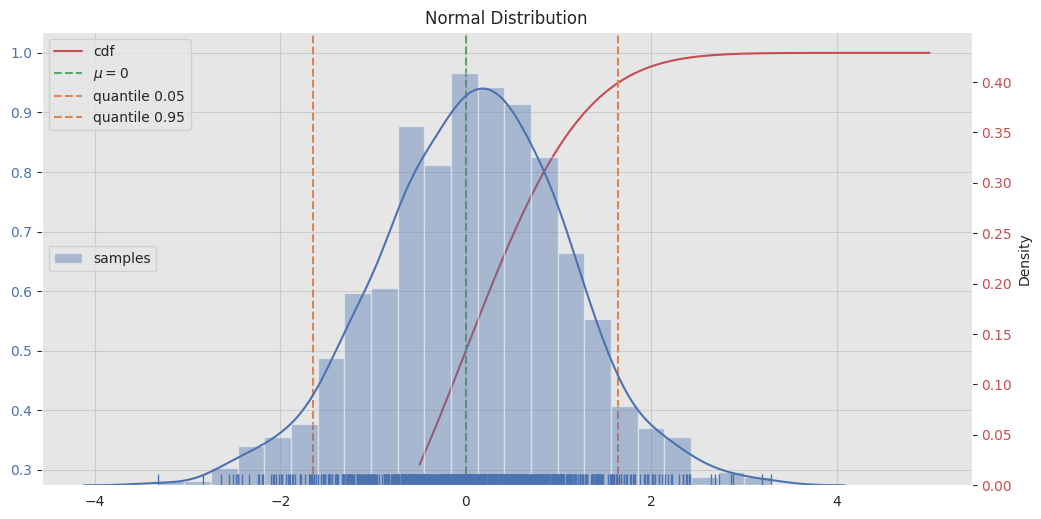

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx() 

sns.lineplot(x=x, y=normal.cdf(x), color=sns_c[3], label='cdf', ax=ax1)
sns.distplot(a=normal.sample(n_samples), color=sns_c[0], label='samples', rug=True, ax=ax2)
ax1.axvline(x=0.0, color=sns_c[2], linestyle='--', label=r'$\mu=0$')

q_list = [0.05, 0.95]
quantiles = normal.quantile(q_list).numpy()
for i, q in zip(q_list , quantiles):
    ax1.axvline(x=q, color=sns_c[1], linestyle='--', label=f'quantile {i}')

ax1.tick_params(axis='y', labelcolor=sns_c[0])
ax2.grid(None)
ax2.tick_params(axis='y', labelcolor=sns_c[3])
ax1.legend(loc='upper left')
ax2.legend(loc='center left')
ax1.set(title='Normal Distribution')

In [ ]:
# a sequence of normal distributions with fixed standard deviation and increasing mean
loc_list = np.linspace(start=0.0, stop=8.0, num=5)
loc_list

array([0., 2., 4., 6., 8.])

In [ ]:
normals = tfd.Normal(loc = loc_list, scale = 0.8)
normal_samples = normals.sample(n_samples)
normal_samples.shape

TensorShape([800, 5])

In [ ]:
normals.batch_shape[0]

5

In [ ]:
normals.event_shape

TensorShape([])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

[Text(0.5, 1.0, 'Batch Samples Normal Distribution')]

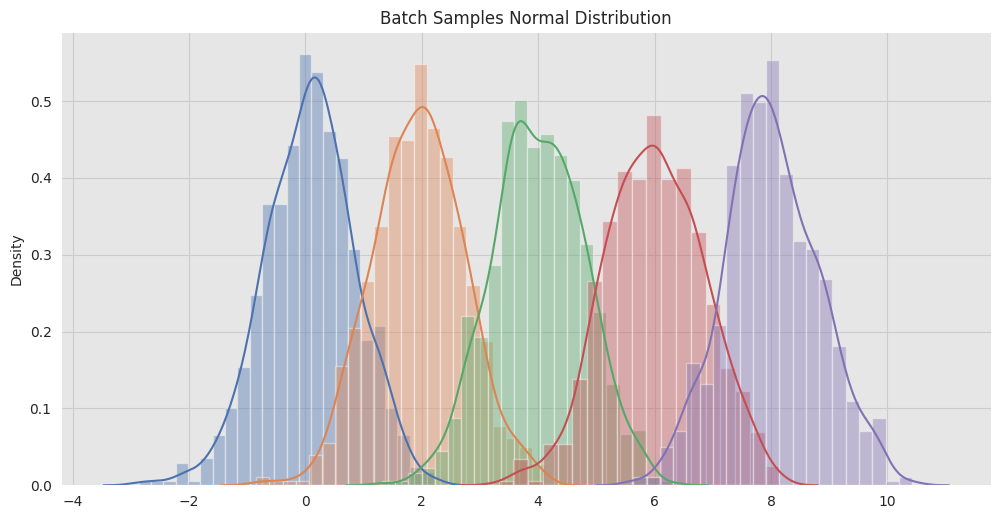

In [ ]:
fig, ax = plt.subplots()
for i in range(normals.batch_shape[0]):
    sns.distplot(a=normal_samples[:, i], ax=ax)
ax.set(title='Batch Samples Normal Distribution')

## Multivariate Normal Distribution

In [ ]:
mu = [1.0, 2.0]
cov = [[2.0, 1.0],
       [1.0, 1.0]]
cholesky = tf.linalg.cholesky(cov)  # the Cholesky decomposition of the covariance matrix 
cholesky

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.4142135 , 0.        ],
       [0.70710677, 0.70710677]], dtype=float32)>

In [ ]:
multi_normal = tfd.MultivariateNormalTriL(loc=mu, scale_tril=cholesky)
multi_normal_samples = multi_normal.sample(n_samples)

Text(0.5, 1.04, 'Multinormal Samples')

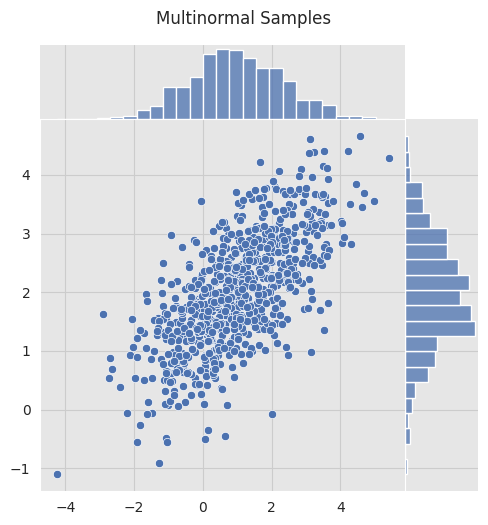

In [ ]:
g = sns.jointplot(
    x=multi_normal_samples[:,0], 
    y=multi_normal_samples[:, 1], 
    space=0,
    height=5,
)
g.fig.suptitle('Multinormal Samples', y=1.04)

## Simple Linear Regression

The following comes from https://juanitorduz.github.io/tfp_lm/

In [ ]:
np.random.seed(42)

In [ ]:
# true parameter values
alpha, sigma = 1, 1
beta = [1.0, 2.5]

# size of dataset
size = 100

# predictor variable
x0 = np.random.randn(size)
#print(x0)
print(x0.dtype)

float64


In [ ]:
x1 = np.random.randn(size)*0.2

# simulate outcome variable
y = alpha + beta[0]*x0 + beta[1]*x1 + np.random.randn(size)*sigma

[Text(0.5, 0, 'y'), Text(0.5, 1.0, '$y$ distribution')]

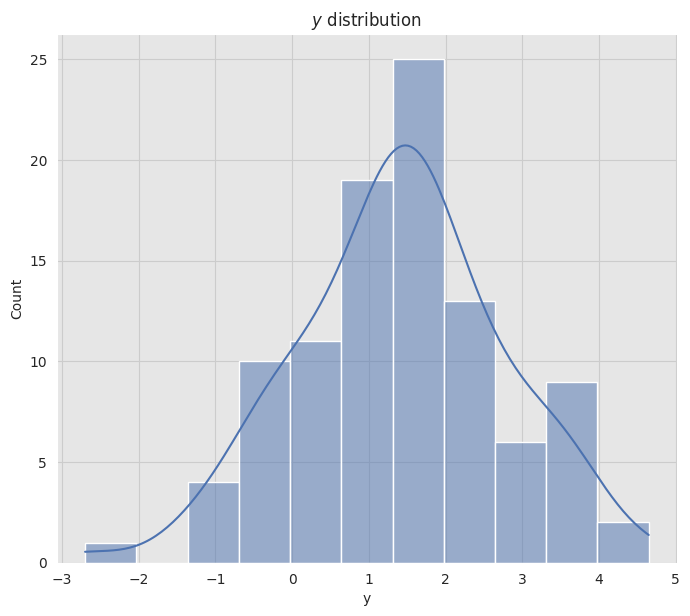

In [ ]:
fig, ax = plt.subplots(figsize=(8, 7))
sns.histplot(x=y, kde=True, ax=ax)
ax.set(title='$y$ distribution', xlabel='y')

In [ ]:
# Set seed.
tf.random.set_seed(42)
# Set tensor numeric type.
dtype = 'float32'

x = np.stack([x0, x1], axis=1)
x = tf.convert_to_tensor(x, dtype=dtype)

y = tf.convert_to_tensor(y, dtype=dtype)
y = tf.reshape(y, (-1, 1))
y.shape

TensorShape([100, 1])

In [ ]:
# using Auto-Batched Joint Distributions to build the model from the mathematical defintion
jds_ab = tfd.JointDistributionNamedAutoBatched(
    dict(
        
        sigma = tfd.HalfNormal(scale = [tf.cast(1.0, dtype)]),
         
         alpha= tfd.Normal(loc=[tf.cast(0.0, dtype)],
                           scale = [tf.cast(100.0, dtype)]),
         
         beta = tfd.Normal(
             loc=[[tf.cast(0.0, dtype)], [tf.cast(0.0, dtype)]],
             scale=[[tf.cast(100.0, dtype)], [tf.cast(100.0, dtype)]]),
         
         y=lambda beta, alpha, sigma:
           tfd.Normal(
               loc=tf.linalg.matmul(x, beta) + alpha,
               scale=sigma
           )
    )
)

### Prior Simulations

In [ ]:
# sample from the prior
prior_samples = jds_ab.sample(500)['y']
